In [2]:
pip install matplotlib seaborn


Looking in indexes: https://mirrors.aliyun.com/pypi/simple/Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.8 MB 15.4 MB/s eta 0:00:01
     - -------------------------------------- 0.4/7.8 MB 4.9 MB/s eta 0:00:02
     -- ------------------------------------- 0.6/7.8 MB 5.1 MB/s eta 0:00:02
     ---- ----------------------------------- 0.8/7.8 MB 5.3 MB/s eta 0:00:02
     ----- ---------------------------------- 1.1/7.8 MB 6.0 MB/s eta 0:00:02
     ------- -------------------------------- 1.4/7.8 MB 6.5 MB/s eta 0:00:01
     -------- ------------------------------- 1.7/7.8 MB 6.4 MB/s eta 0:00:01
     ---------- ----------------------------- 2.0/7.8 MB 6.3 MB/s eta 0:00:01
     ----------- ---------------------------- 2.2/7.8 MB 6.3 MB/s eta 0:00:01
     ------------- -------------------------- 2.6/7.8 MB 7.0 MB/s eta 0:00:01
     -------------- ------------------------- 2.9/7.8 MB 6.8 MB/s eta 0:00:01
     ---------------- ----------------------- 3.1/7.8 MB 7.2 MB/s eta

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Model results for the old dataset
old_data_results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy (Old)": [0.79, 0.76, 0.77]
}

# Model results for the expanded dataset
expanded_data_results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy (New)": [0.78, 0.86, 0.87]
}

# Create DataFrames
df_old = pd.DataFrame(old_data_results)
df_expanded = pd.DataFrame(expanded_data_results)

# Merge the data for comparison
comparison_df = pd.merge(df_old, df_expanded, on="Model")


In [5]:
 # Display results in a tabular format
print(comparison_df)


                 Model  Accuracy (Old)  Accuracy (New)
0  Logistic Regression            0.79            0.78
1        Random Forest            0.76            0.86
2              XGBoost            0.77            0.87


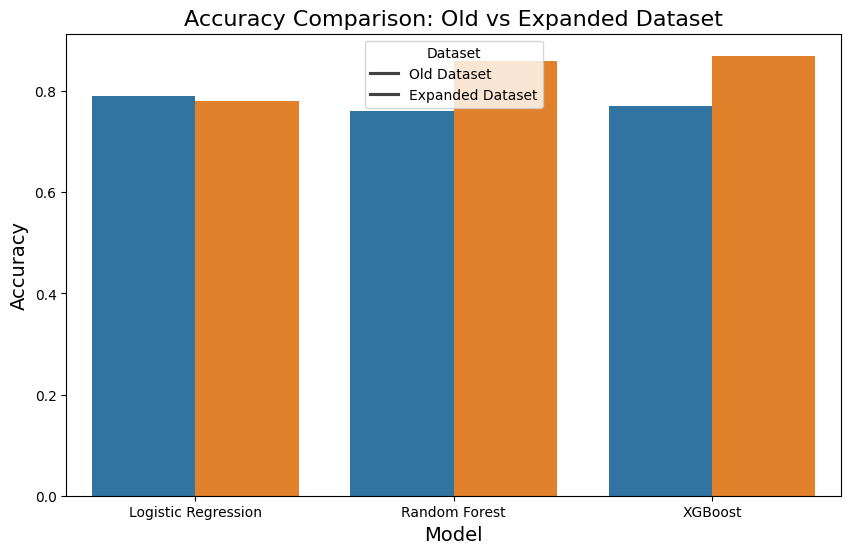

In [6]:
# Set the data for visualization
comparison_df_melted = pd.melt(comparison_df, id_vars=["Model"], 
                               var_name="Dataset", value_name="Accuracy")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", hue="Dataset", data=comparison_df_melted)
plt.title("Accuracy Comparison: Old vs Expanded Dataset", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.legend(title="Dataset", labels=["Old Dataset", "Expanded Dataset"])
plt.show()


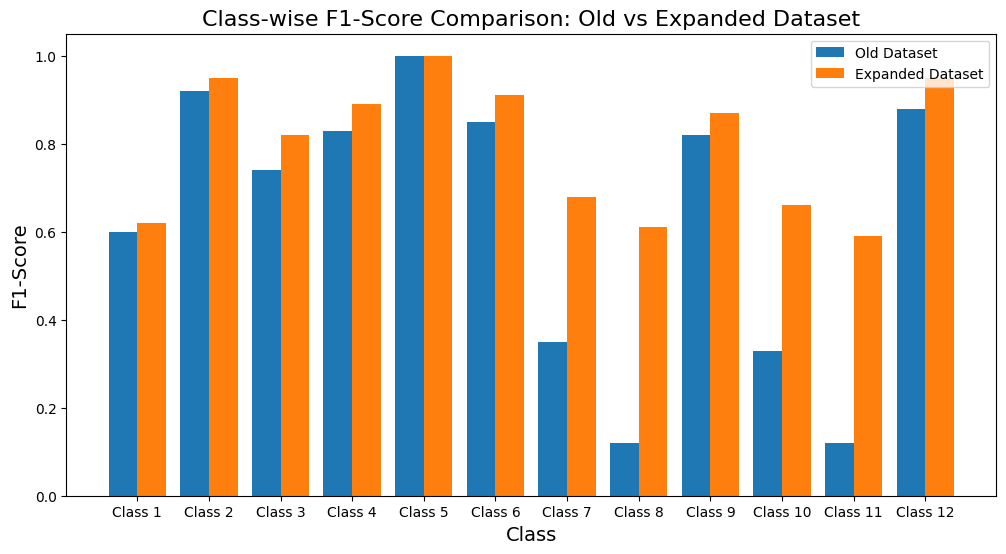

In [7]:
# Example F1-scores for old and new data
classes = [f"Class {i}" for i in range(1, 13)]
old_f1_scores = [0.60, 0.92, 0.74, 0.83, 1.00, 0.85, 0.35, 0.12, 0.82, 0.33, 0.12, 0.88]
new_f1_scores = [0.62, 0.95, 0.82, 0.89, 1.00, 0.91, 0.68, 0.61, 0.87, 0.66, 0.59, 0.95]

# Create a DataFrame for visualization
f1_df = pd.DataFrame({
    "Class": classes,
    "F1-Score (Old)": old_f1_scores,
    "F1-Score (New)": new_f1_scores
})

# Plot F1-score comparison
plt.figure(figsize=(12, 6))
x = range(len(classes))
plt.bar(x, f1_df["F1-Score (Old)"], width=0.4, label="Old Dataset", align='center')
plt.bar([i + 0.4 for i in x], f1_df["F1-Score (New)"], width=0.4, label="Expanded Dataset", align='center')
plt.xticks([i + 0.2 for i in x], classes)
plt.title("Class-wise F1-Score Comparison: Old vs Expanded Dataset", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("F1-Score", fontsize=14)
plt.legend()
plt.show()


                 Model  Accuracy (Old)  Accuracy (New)  Accuracy Improvement
0  Logistic Regression            0.79            0.78                 -0.01
1        Random Forest            0.76            0.86                  0.10
2              XGBoost            0.77            0.87                  0.10


C:\Users\Joshua_zza\AppData\Local\Temp\ipykernel_51604\1562764135.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy Improvement", data=comparison_df, palette="coolwarm")


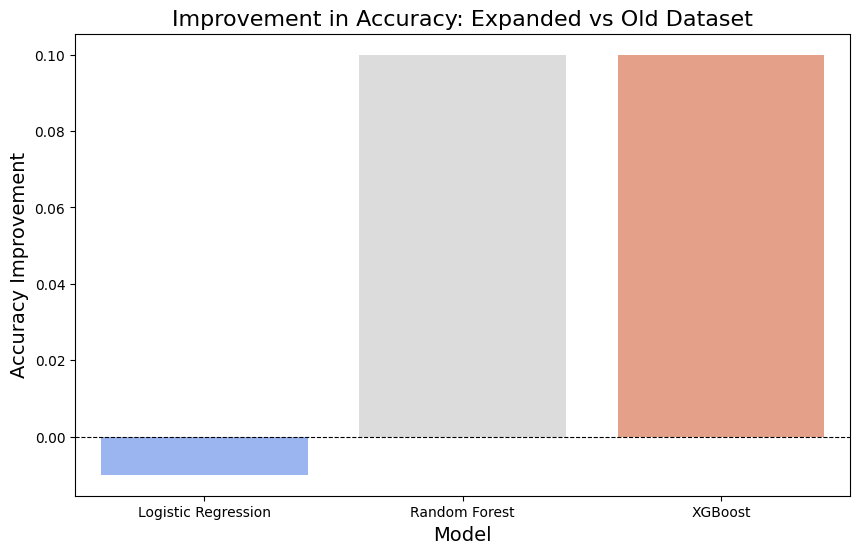

In [8]:
# Add improvement column
comparison_df["Accuracy Improvement"] = comparison_df["Accuracy (New)"] - comparison_df["Accuracy (Old)"]

# Display the table
print(comparison_df)

# Visualization of improvement
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy Improvement", data=comparison_df, palette="coolwarm")
plt.title("Improvement in Accuracy: Expanded vs Old Dataset", fontsize=16)
plt.ylabel("Accuracy Improvement", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.show()
